In [142]:
import pyprind
import pandas as pd
from string import punctuation
import re
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

df = pd.read_csv('IMDB Dataset.csv.zip', encoding='utf-8')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [143]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [144]:
# Split into train,validation, and test 

X_data = df['review']
y_data = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0)


In [145]:
total_words = 5000
max_length = 500

In [146]:
tokenizer = Tokenizer(num_words=total_words,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [147]:
len(tokenizer.word_index)

90644

In [148]:
# Tokenizer
train_seq = tokenizer.texts_to_sequences(X_train)
# Padding
train_padd = pad_sequences(train_seq,maxlen=max_length,truncating='post')

In [150]:
# Tokenizer
test_seq = tokenizer.texts_to_sequences(X_test)
# Padding
test_padd = pad_sequences(test_seq,maxlen=max_length,truncating='post')

In [151]:
max_seq_len = max([len(x) for x in train_padd])
max_seq_len

500

In [161]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D


embedding_dim=16

# Model
model = Sequential()
model.add(Embedding(total_words,embedding_dim,input_length =max_length))
model.add(layers.Conv1D(32, 7, activation='relu')) #filter : 32 /  length : 7 / width:128 
model.add(layers.MaxPool1D(5))  #5 : length of pooling filter / width = 1 /  stride=5 
model.add(Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 500, 16)           80000     
                                                                 
 conv1d_13 (Conv1D)          (None, 494, 32)           3616      
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 98, 32)            0         
 ng1D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 98, 32)            0         
                                                                 
 flatten_6 (Flatten)         (None, 3136)              0         
                                                                 
 dense_18 (Dense)            (None, 32)                100384    
                                                     

In [177]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
 
history = model.fit(train_padd, y_train, epochs=10, batch_size=128, validation_data=(test_padd,y_test))

Epoch 1/10
196/196 [==============================] - 5s 23ms/step - loss: 0.6231 - accuracy: 0.6046 - val_loss: 0.3415 - val_accuracy: 0.8546
Epoch 2/10
196/196 [==============================] - 4s 22ms/step - loss: 0.2905 - accuracy: 0.8796 - val_loss: 0.2837 - val_accuracy: 0.8808
Epoch 3/10
196/196 [==============================] - 4s 22ms/step - loss: 0.2311 - accuracy: 0.9081 - val_loss: 0.3011 - val_accuracy: 0.8744
Epoch 4/10
196/196 [==============================] - 5s 26ms/step - loss: 0.1998 - accuracy: 0.9224 - val_loss: 0.2939 - val_accuracy: 0.8803
Epoch 5/10
196/196 [==============================] - 4s 22ms/step - loss: 0.1767 - accuracy: 0.9313 - val_loss: 0.3056 - val_accuracy: 0.8785
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 0.1594 - accuracy: 0.9402 - val_loss: 0.3309 - val_accuracy: 0.8757
Epoch 7/10
196/196 [==============================] - 5s 24ms/step - loss: 0.1438 - accuracy: 0.9448 - val_loss: 0.3314 - val_accuracy: 0.8745

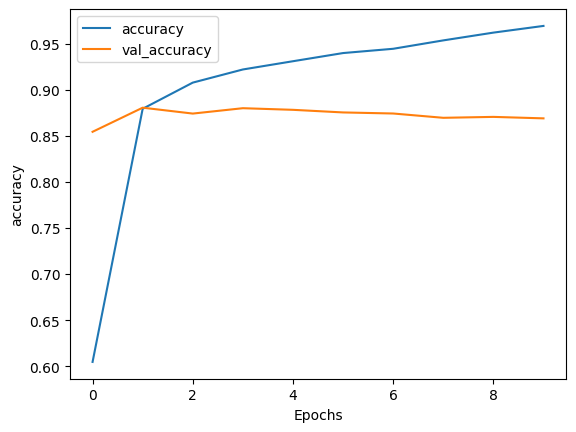

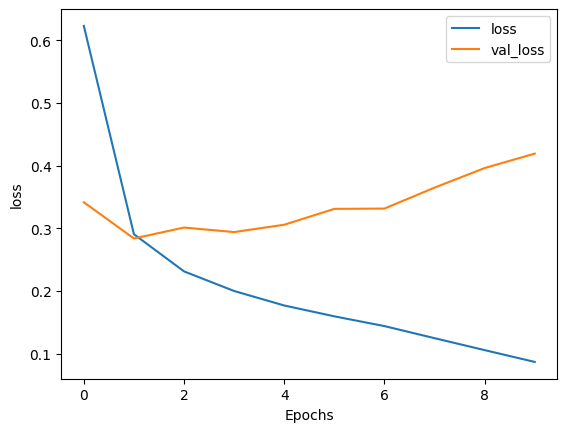

In [178]:
def plot_graphs(history, string):
        plt.plot(history.history[string])
        plt.plot(history.history['val_'+string])
        plt.xlabel("Epochs")
        plt.ylabel(string)
        plt.legend([string, 'val_'+string])
        plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [179]:
model.evaluate(test_padd,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8692


[0.4191984236240387, 0.8692399859428406]